In [1]:
import sys, os
sys.path.append(os.path.abspath('/spark-data'))
from pyspark.sql import SparkSession

In [2]:
# Initialize Spark session with both configurations
spark = SparkSession.builder \
    .appName("Visualization") \
    .config("spark.driver.memory", "4g") \
    .config("spark.executor.memory", "4g") \
    .config("spark.jars.packages", "org.postgresql:postgresql:42.2.20,com.crealytics:spark-excel_2.12:3.4.1_0.19.0") \
    .getOrCreate()


:: loading settings :: url = jar:file:/opt/bitnami/spark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /root/.ivy2/cache
The jars for the packages stored in: /root/.ivy2/jars
org.postgresql#postgresql added as a dependency
com.crealytics#spark-excel_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-a9f91583-77e3-47de-bff3-a33271c4a4a2;1.0
	confs: [default]
	found org.postgresql#postgresql;42.2.20 in central
	found org.checkerframework#checker-qual;3.5.0 in central
	found com.crealytics#spark-excel_2.12;3.4.1_0.19.0 in central
	found org.apache.poi#poi;5.2.3 in central
	found commons-codec#commons-codec;1.15 in central
	found org.apache.commons#commons-collections4;4.4 in central
	found org.apache.commons#commons-math3;3.6.1 in central
	found com.zaxxer#SparseBitSet;1.2 in central
	found org.apache.poi#poi-ooxml;5.2.3 in central
	found org.apache.poi#poi-ooxml-lite;5.2.3 in central
	found org.apache.xmlbeans#xmlbeans;5.1.1 in central
	found com.github.virtuald#curvesapi;1.07 in central
	found com.norbitltd#spoiwo_2.12;2

# Load all dataframes from the Database

In [3]:
from utils.postgres_setup import load_all_tables

In [4]:
# PostgreSQL connection details
jdbc_url = "jdbc:postgresql://host.docker.internal:5432/spark_data"
properties = {
    "user": "postgres",
    "password": "Mayank@123",
    "driver": "org.postgresql.Driver"
}

In [5]:
dfs = load_all_tables(spark, jdbc_url, properties)

2024-09-09 09:16:19,739 - INFO - Fetching table names from PostgreSQL.
2024-09-09 09:16:22,523 - INFO - Loading table review into DataFrame.
2024-09-09 09:16:22,645 - INFO - Loading table product into DataFrame.
2024-09-09 09:16:22,738 - INFO - Loading table order_item into DataFrame.
2024-09-09 09:16:22,828 - INFO - Loading table customer into DataFrame.
2024-09-09 09:16:22,907 - INFO - Loading table orders into DataFrame.
2024-09-09 09:16:22,979 - INFO - Successfully loaded all tables into DataFrames.


In [6]:
df_product = dfs["product"]
df_order = dfs["orders"]
df_review = dfs["review"]
df_order_item = dfs["order_item"]
df_customer = dfs["customer"]

In [7]:
df_product.show()

+----------+------------+--------+-----+--------------------+---------+
|product_id|product_name|category|price|         description|inventory|
+----------+------------+--------+-----+--------------------+---------+
|       402|         son| clearly|  227|       Not Available|      479|
|      1301|        mean|   three|  869|Provide staff sta...|      388|
|      1437|        note| project|  108|       Not Available|      473|
|      1582|   direction|   shake|  198|Your book attenti...|      623|
|      1622|   recognize|    keep|  552|       Not Available|      872|
|      1859|       guess|    goal|  187|Success likely pr...|      999|
|      2088|        news|    unit|  926|Down house newspa...|      122|
|      2409|     defense|   close|  228|Development cultu...|      258|
|      2803|        from|     all|    6|Region inside get...|      164|
|      2843|   including| billion|  608|Early direction h...|      556|
|      2958|         gun|    hope|  204|Campaign resource...|   

In [8]:
df_order_item.show()

+--------+-------------+-----+----------+--------+
|order_id|order_item_id|price|product_id|quantity|
+--------+-------------+-----+----------+--------+
|    1493|          618|   28|      2098|       3|
|    4734|          766|   21|      2864|       9|
|    2582|          809|   19|      1622|       6|
|    4589|         1181|    8|      2274|       8|
|    4954|         1258|   32|      3693|       8|
|     114|         1321|   45|      1739|       7|
|     381|         1717|   91|       429|       9|
|    2697|         1903|   24|      3119|       9|
|    2807|         2003|   83|      4378|       8|
|     652|         2139|    1|      2086|       6|
|    3399|         2255|   84|      2035|       1|
|    1419|         2263|   99|      4911|       6|
|    4270|         2354|   98|      1845|       3|
|    3523|         2374|   32|      1740|       2|
|    1453|         2590|   49|      1694|       0|
|    3588|         2768|   15|      4873|       0|
|    3554|         3147|   98| 

In [9]:
df_review.show()

+-----------+----------+------+-----------+---------+--------------------+
|customer_id|product_id|rating|review_date|review_id|         review_text|
+-----------+----------+------+-----------+---------+--------------------+
|       4968|      4810|     5| 2024-05-29|     5726|       Not Available|
|       4881|      4880|     4| 2023-05-02|     3188|       Not Available|
|       2366|      1687|     2| 2024-03-23|     8827|Work ever whose e...|
|       3211|      3841|     5| 2023-02-14|     3543|       Not Available|
|       3597|      4125|     2| 2024-08-16|     1954|Bring heavy reall...|
|       3208|      4248|     4| 2023-01-02|     6258|       Not Available|
|       4748|      3109|     3| 2023-11-01|     3669|       Not Available|
|          8|      1409|     5| 2024-05-31|     3166|Community land st...|
|       2236|      1071|     0| 2024-04-08|     7649|Piece into by wei...|
|        862|      2162|     1| 2024-04-04|     2014|       Not Available|
|        175|      4771| 

In [10]:
df_order.show()

+--------+-----------+----------+------------+--------------------+--------------------+--------------+-------------+
|order_id|customer_id|order_date|total_amount|    shipping_address|     billing_address|shipping_state|billing_state|
+--------+-----------+----------+------------+--------------------+--------------------+--------------+-------------+
|      97|        207|2021-05-21|        8919|USS Gardner FPO A...|510 Thomas Lake H...|            AA|           VT|
|     631|       2298|2019-11-09|        4130|442 Smith Orchard...|USNS Rodriguez FP...|            AS|           AA|
|      91|        456|2019-12-15|        4365|9171 Allen Lodge ...|USS Rogers FPO AP...|            DE|           AP|
|    2717|       4571|2020-09-29|        5370|USCGC Deleon FPO ...|Unit 6976 Box 131...|            AE|           AP|
|    2268|       1315|2019-11-09|        7636|PSC 9843, Box 954...|4296 Olivia Well ...|            AP|           SD|
|    2266|       3659|2022-03-27|        7814|USNS Carpe

# Now Starting Visualization Part

### Top 10 Selling Products

In [11]:
from utils.Data_Visualization.visualization import get_top_selling_products

2024-09-09 09:16:25,812 - INFO - Starting the process to get top selling products.
2024-09-09 09:16:25,819 - INFO - Joining order and product DataFrames.
2024-09-09 09:16:25,855 - INFO - Aggregating total quantities by product name.
2024-09-09 09:16:25,912 - INFO - Sorting products by total quantity and selecting the top 10.
2024-09-09 09:16:25,934 - INFO - Collecting the top products data.
2024-09-09 09:16:27,515 - INFO - Plotting the top selling products.


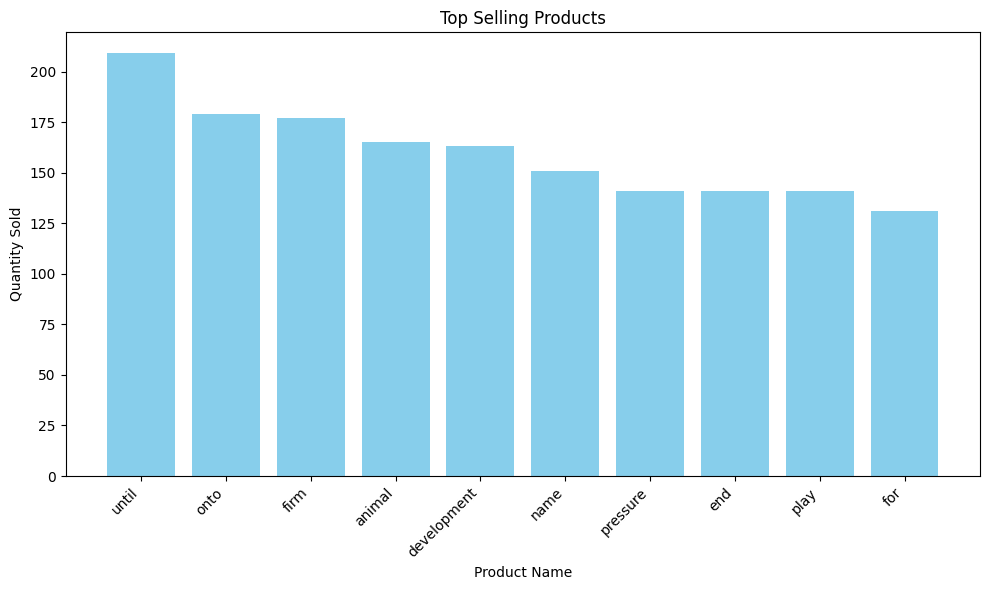

2024-09-09 09:16:27,735 - INFO - Successfully completed the plotting of top selling products.


In [12]:
get_top_selling_products(df_order_item, df_product)

### TOP 5 products by age groups

In [13]:
from utils.Data_Visualization.visualization import get_top_products_by_age_group

2024-09-09 09:16:27,772 - INFO - Calculating customer age and creating age groups.
2024-09-09 09:16:27,860 - INFO - Joining customer, order, and order item DataFrames.
2024-09-09 09:16:27,909 - INFO - Aggregating product purchases by age group and product.
2024-09-09 09:16:27,953 - INFO - Retrieving the top 5 products for each age group.
2024-09-09 09:16:28,018 - INFO - Joining with product names for top products.
2024-09-09 09:16:28,043 - INFO - Collecting data for plotting.
2024-09-09 09:16:29,510 - INFO - Plotting the top 5 products by age group.


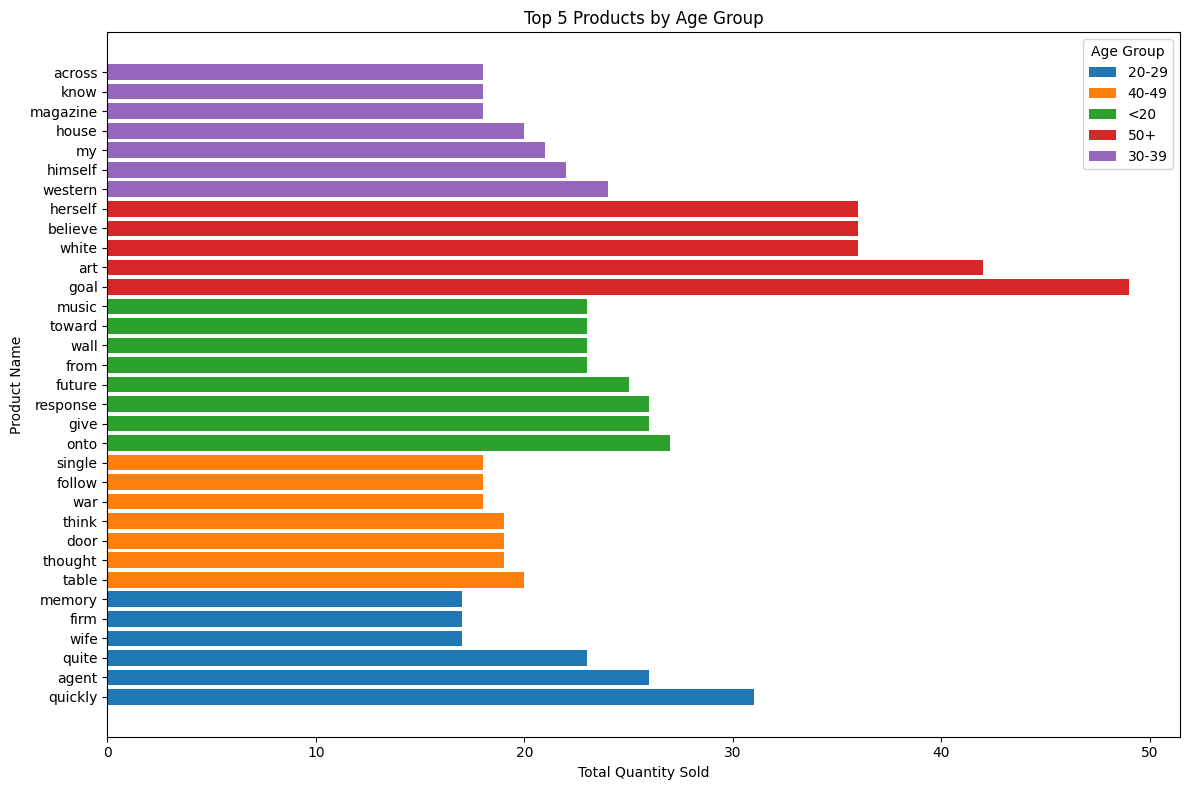

2024-09-09 09:16:29,814 - INFO - Successfully completed the top 5 products by age group plotting.
2024-09-09 09:16:29,816 - INFO - Starting the process to calculate top revenue-generating products.
2024-09-09 09:16:29,817 - INFO - Joining order items and product DataFrames.
2024-09-09 09:16:29,829 - INFO - Calculating revenue for each product.
2024-09-09 09:16:30,016 - ERROR - An error occurred: [AMBIGUOUS_REFERENCE] Reference `price` is ambiguous, could be: [`price`, `price`].


In [14]:
get_top_products_by_age_group(df_customer, df_order, df_order_item, df_product)

### Get Number of revenue generating project highest to lowest

In [15]:
from utils.Data_Visualization.visualization import get_top_revenue_generating_products

2024-09-09 09:16:30,043 - INFO - Starting the process to calculate top revenue-generating products.
2024-09-09 09:16:30,045 - INFO - Calculating unit price (price divided by quantity).
2024-09-09 09:16:30,121 - INFO - Joining order items and product DataFrames.
2024-09-09 09:16:30,139 - INFO - Calculating revenue for each product.
2024-09-09 09:16:30,165 - INFO - Aggregating total revenue by product name.
2024-09-09 09:16:30,199 - INFO - Sorting products by total revenue and selecting the top 30.
2024-09-09 09:16:30,220 - INFO - Collecting the top products by revenue data.
2024-09-09 09:16:30,805 - INFO - Plotting the top revenue-generating products.


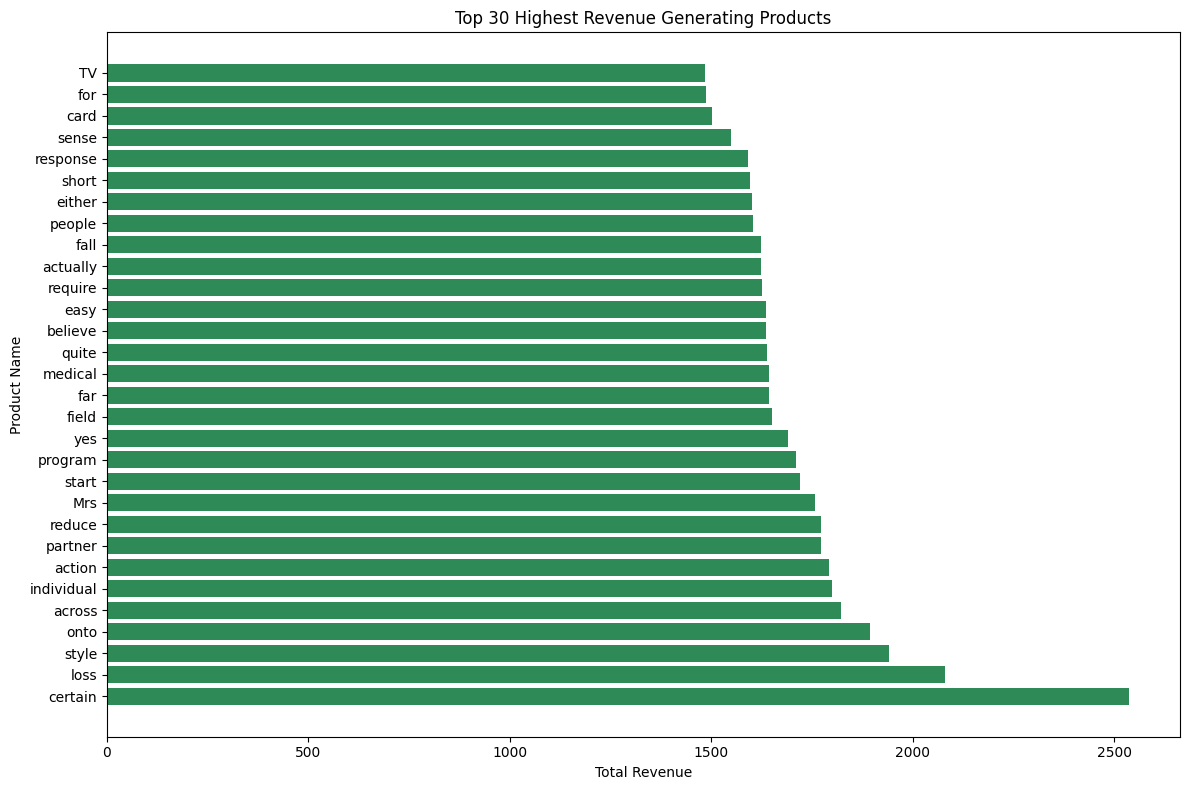

2024-09-09 09:16:31,070 - INFO - Successfully completed the top 30 highest revenue-generating products plotting.


In [16]:
get_top_revenue_generating_products(df_order_item, df_product, top_n=30)

### Frequesnt Ordered Products

In [17]:
from utils.Data_Visualization.visualization import get_frequently_ordered_products

2024-09-09 09:16:31,107 - INFO - Starting the process to calculate the most frequently ordered products.
2024-09-09 09:16:31,108 - INFO - Joining order items and product DataFrames.
2024-09-09 09:16:31,124 - INFO - Aggregating the number of times each product was ordered.
2024-09-09 09:16:31,152 - INFO - Sorting products by order count and selecting the top 10.
2024-09-09 09:16:31,170 - INFO - Collecting the top frequently ordered products data.
2024-09-09 09:16:31,663 - INFO - Plotting the top frequently ordered products.


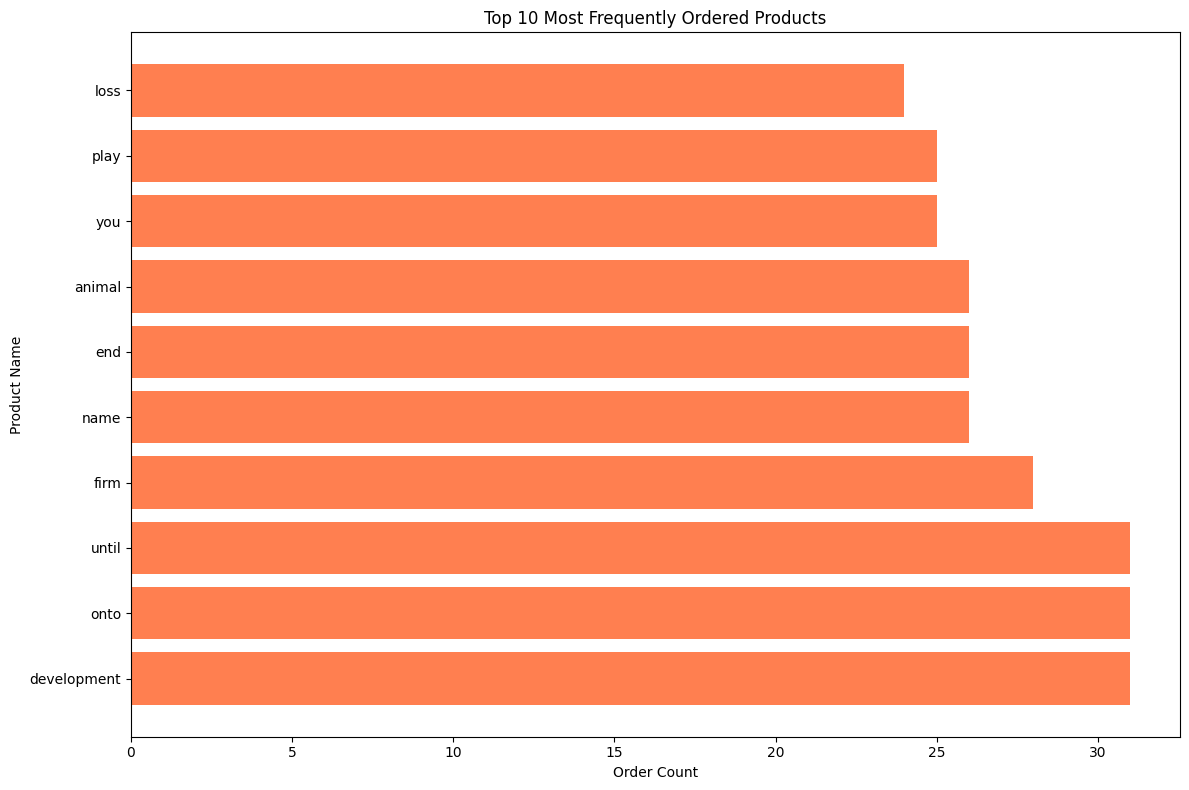

2024-09-09 09:16:31,795 - INFO - Successfully completed the top 10 frequently ordered products plotting.


In [18]:
get_frequently_ordered_products(df_order_item, df_product, top_n=10)

### Most Frequently Ordered Products Year Wise

In [19]:
from utils.Data_Visualization.visualization import get_frequently_ordered_products_by_year

2024-09-09 09:16:31,824 - INFO - Starting the process to calculate the most frequently ordered products for the year 2023.
2024-09-09 09:16:31,831 - INFO - Filtering orders for the year 2023.
2024-09-09 09:16:31,851 - INFO - Joining filtered orders, order items, and product DataFrames.
2024-09-09 09:16:31,876 - INFO - Aggregating the number of times each product was ordered.
2024-09-09 09:16:31,900 - INFO - Sorting products by order count and selecting the top 20.
2024-09-09 09:16:31,915 - INFO - Collecting the top frequently ordered products data.
2024-09-09 09:16:32,487 - INFO - Plotting the top frequently ordered products for the year.


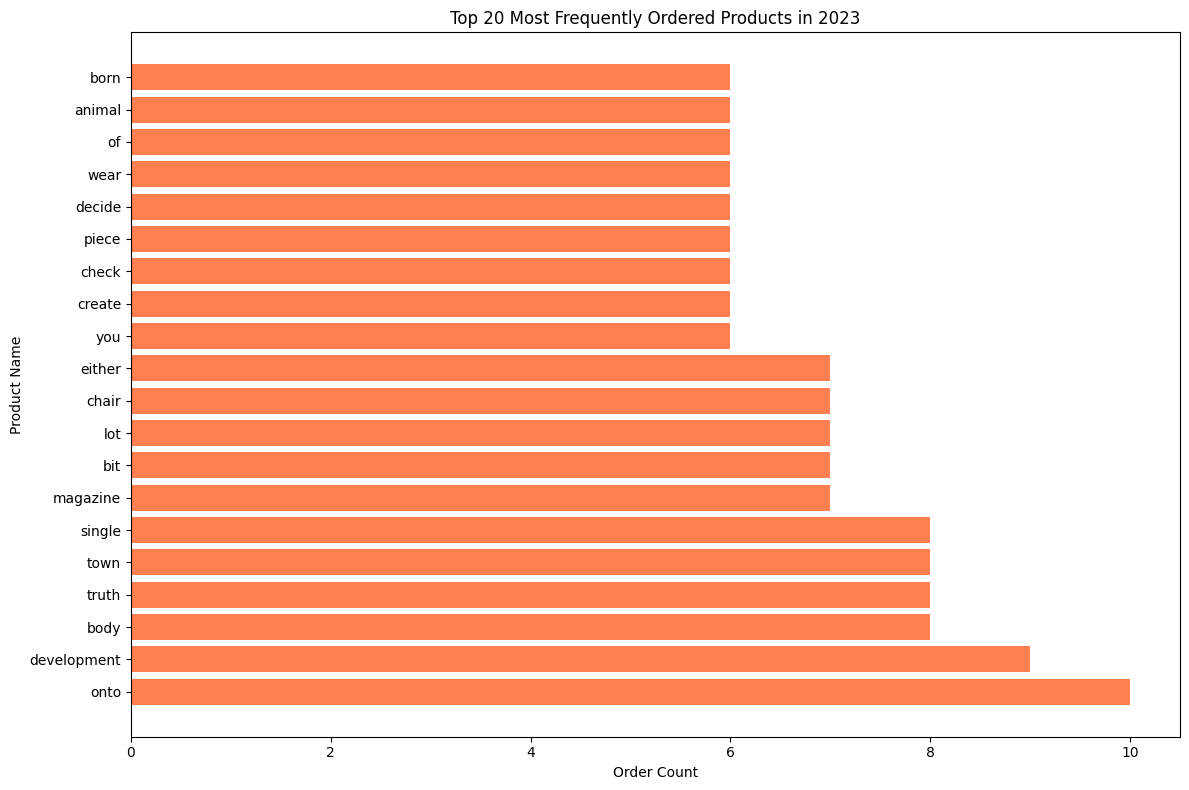

2024-09-09 09:16:32,640 - INFO - Successfully completed the top 20 frequently ordered products for the year 2023.


In [20]:
get_frequently_ordered_products_by_year(df_order_item, df_product, df_order, year_filter=2023, top_n=20)

### Most Frequently Ordered Products Age Group Wise 

In [21]:
from utils.Data_Visualization.visualization import get_frequently_ordered_products_by_age_group

2024-09-09 09:16:32,665 - INFO - Starting the process to calculate the most frequently ordered products by customer age group.
2024-09-09 09:16:32,669 - INFO - Calculating customer age and creating age groups.
2024-09-09 09:16:32,727 - INFO - Joining customers, orders, order items, and products DataFrames.
2024-09-09 09:16:32,765 - INFO - Aggregating order counts by age group and product.
2024-09-09 09:16:32,797 - INFO - Finding the top 2 products for each age group.
2024-09-09 09:16:32,851 - INFO - Collecting the top products data for each age group.
2024-09-09 09:16:33,670 - INFO - Preparing data for plotting.


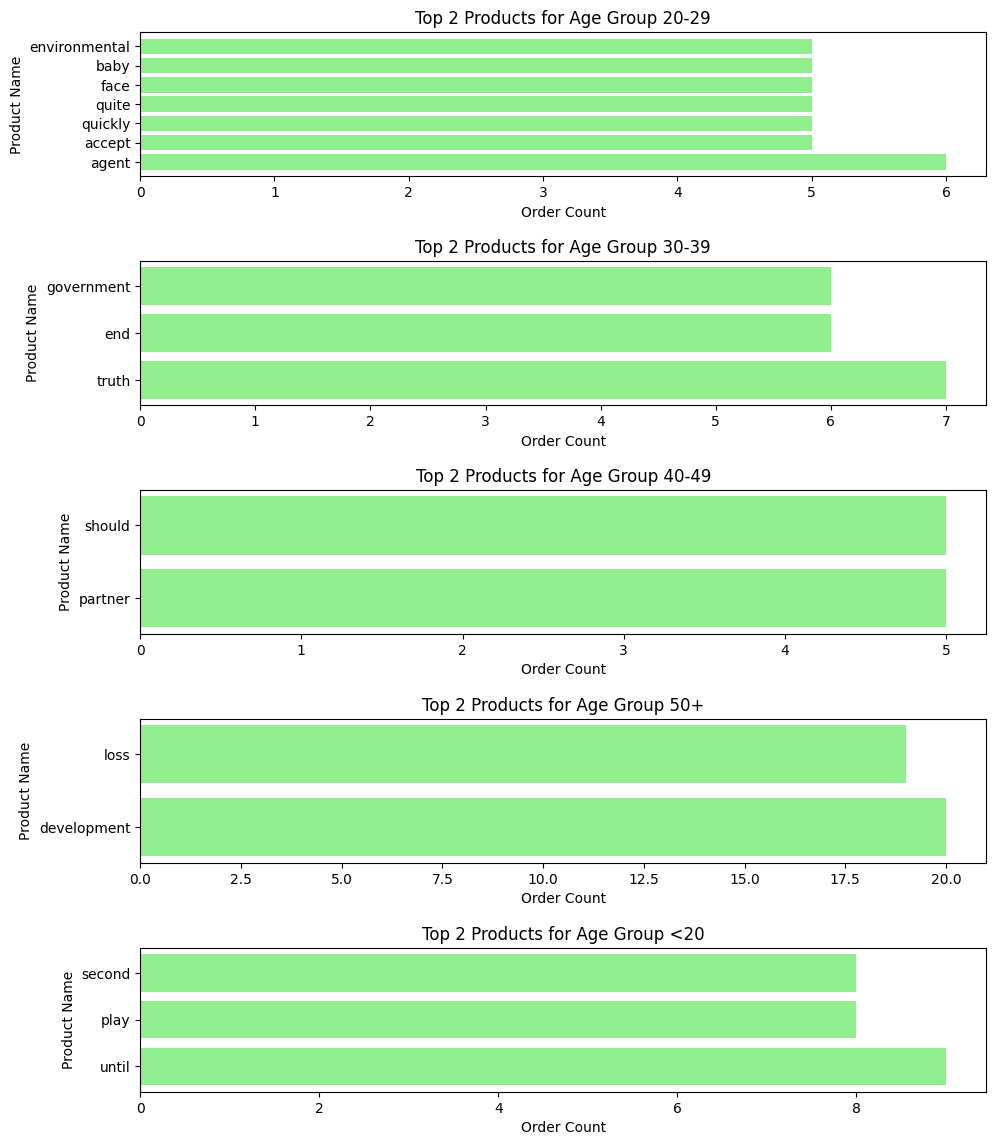

2024-09-09 09:16:34,034 - INFO - Successfully plotted the top products by age group.


In [22]:
get_frequently_ordered_products_by_age_group(df_order_item, df_product, df_order, df_customer, top_n=2)

### Average Revenue Products

In [23]:
from utils.Data_Visualization.visualization import get_average_revenue_by_category

In [24]:
df_get_average_revenue_per_product_category = get_average_revenue_by_category(df_order_item, df_product)

2024-09-09 09:16:34,068 - INFO - Starting the process to calculate average revenue by product category.
2024-09-09 09:16:34,070 - INFO - Renaming 'price' column in order items to avoid ambiguity.
2024-09-09 09:16:34,078 - INFO - Joining order items with products to calculate revenue.
2024-09-09 09:16:34,091 - INFO - Calculating revenue for each product (order_price * quantity).
2024-09-09 09:16:34,114 - INFO - Grouping by product category and calculating average revenue.
2024-09-09 09:16:34,144 - INFO - Successfully calculated average revenue by category. Returning the DataFrame.


In [25]:
df_get_average_revenue_per_product_category.show()

+----------+---------------+
|  category|average_revenue|
+----------+---------------+
|    travel|            411|
|      hope|            320|
|     those|            209|
|     still|            315|
|       few|            203|
|      some|            511|
| recognize|            345|
|       art|            203|
|  positive|            316|
|     staff|            373|
|     often|            230|
| operation|            240|
|   include|            229|
|television|            251|
|     watch|            217|
|    growth|            284|
|   explain|            150|
| character|            341|
|      film|            247|
|   prevent|            355|
+----------+---------------+
only showing top 20 rows



In [26]:
from utils.Data_Visualization.visualization import plot_top_n_average_revenue

2024-09-09 09:16:34,754 - INFO - Starting the plotting process for top 10 categories by average revenue.
2024-09-09 09:16:34,756 - INFO - Sorting the DataFrame by average revenue and selecting the top 10.
2024-09-09 09:16:34,777 - INFO - Collecting the data for plotting.
2024-09-09 09:16:35,205 - INFO - Plotting the top categories by average revenue.


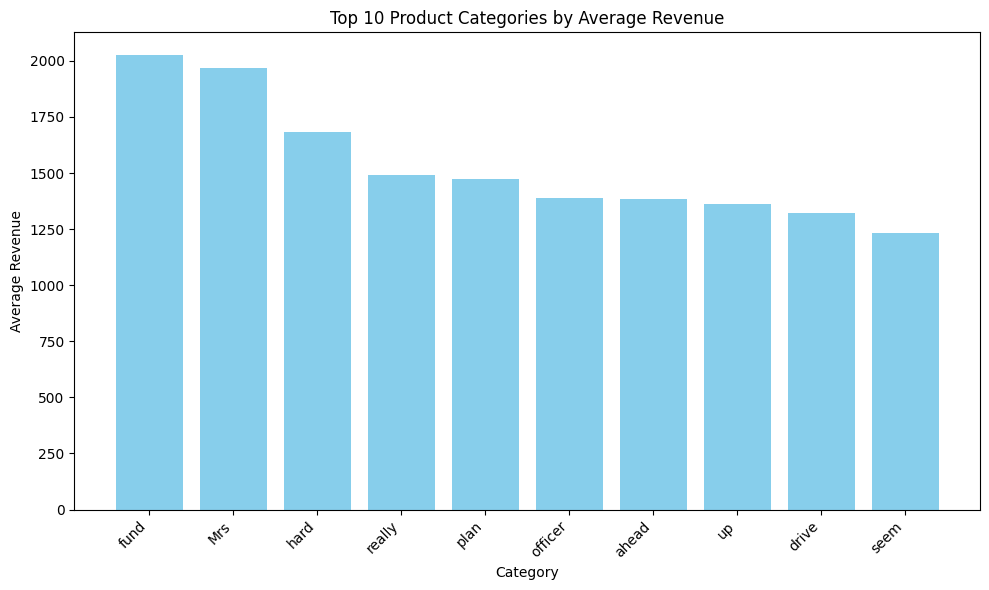

2024-09-09 09:16:35,331 - INFO - Successfully completed plotting.


In [27]:
plot_top_n_average_revenue(df_get_average_revenue_per_product_category, top_n=10)

### Product wise total revenue

In [28]:
from utils.Data_Visualization.visualization import get_total_revenue_by_product

In [29]:
df_total_revenue_by_product = get_total_revenue_by_product(df_order_item, df_product)

2024-09-09 09:16:35,360 - INFO - Starting the process to calculate total revenue by product.
2024-09-09 09:16:35,369 - INFO - Joining order_items with products to get product names.
2024-09-09 09:16:35,396 - INFO - Calculating revenue for each product.
2024-09-09 09:16:35,413 - INFO - Grouping by product_id and product_name to calculate total revenue.
2024-09-09 09:16:35,439 - INFO - Successfully calculated total revenue by product.


In [30]:
df_total_revenue_by_product.show()

+----------+------------+-------------+
|product_id|product_name|total_revenue|
+----------+------------+-------------+
|      2088|        news|      12038.0|
|       296|    suddenly|       6223.0|
|       467|        want|       1656.0|
|       675|      chance|       4710.0|
|       691|    physical|       3200.0|
|       829|  individual|       4815.0|
|      1090|     several|       3312.0|
|      1159|     western|       1950.0|
|      1512|    somebody|        264.0|
|      1572|      player|      19768.0|
|      2069|  investment|       3114.0|
|      2136|       sense|      14166.0|
|      2294|       chair|      14640.0|
|      3414|       along|       1449.0|
|      3606|      reason|       1595.0|
|      3959|        wide|       1067.0|
|      4032|    positive|      16200.0|
|      4821|       state|       1958.0|
|      4937|        this|      17309.0|
|       125|      effect|        825.0|
+----------+------------+-------------+
only showing top 20 rows



### Get Inventory Status

In [31]:
from utils.Data_Visualization.visualization import get_inventory_status

In [32]:
df_get_inventory_status = get_inventory_status(df_order_item, df_product)

2024-09-09 09:16:35,812 - INFO - Starting the process to determine inventory status by product.
2024-09-09 09:16:35,815 - INFO - Calling get_total_revenue_by_product to get revenue data.
2024-09-09 09:16:35,817 - INFO - Starting the process to calculate total revenue by product.
2024-09-09 09:16:35,826 - INFO - Joining order_items with products to get product names.
2024-09-09 09:16:35,838 - INFO - Calculating revenue for each product.
2024-09-09 09:16:35,865 - INFO - Grouping by product_id and product_name to calculate total revenue.
2024-09-09 09:16:35,897 - INFO - Successfully calculated total revenue by product.
2024-09-09 09:16:35,905 - INFO - Joining total revenue with products to get inventory and determine status.
2024-09-09 09:16:35,933 - INFO - Assigning inventory status based on revenue and inventory conditions.
2024-09-09 09:16:35,993 - INFO - Successfully determined inventory status for each product.


In [33]:
df_get_inventory_status.show()

+----------+------------+---------+-------------+----------------+
|product_id|product_name|inventory|total_revenue|inventory_status|
+----------+------------+---------+-------------+----------------+
|      2088|        news|      122|      12038.0|        In stock|
|       296|    suddenly|      890|       6223.0|        In stock|
|       467|        want|      114|       1656.0|        In stock|
|       675|      chance|       46|       4710.0|   To be ordered|
|       691|    physical|      186|       3200.0|        In stock|
|       829|  individual|      268|       4815.0|        In stock|
|      1090|     several|      784|       3312.0|        In stock|
|      1159|     western|      825|       1950.0|        In stock|
|      1512|    somebody|      101|        264.0|        In stock|
|      1572|      player|      734|      19768.0|        In stock|
|      2069|  investment|      757|       3114.0|        In stock|
|      2136|       sense|      319|      14166.0|        In st

In [34]:
from utils.Data_Visualization.visualization import plot_inventory_status_percentage

2024-09-09 09:16:36,436 - INFO - Starting the process to get inventory status and plot it.
2024-09-09 09:16:36,440 - INFO - Calling get_inventory_status to retrieve inventory status for each product.
2024-09-09 09:16:36,442 - INFO - Starting the process to determine inventory status by product.
2024-09-09 09:16:36,444 - INFO - Calling get_total_revenue_by_product to get revenue data.
2024-09-09 09:16:36,446 - INFO - Starting the process to calculate total revenue by product.
2024-09-09 09:16:36,454 - INFO - Joining order_items with products to get product names.
2024-09-09 09:16:36,468 - INFO - Calculating revenue for each product.
2024-09-09 09:16:36,491 - INFO - Grouping by product_id and product_name to calculate total revenue.
2024-09-09 09:16:36,518 - INFO - Successfully calculated total revenue by product.
2024-09-09 09:16:36,526 - INFO - Joining total revenue with products to get inventory and determine status.
2024-09-09 09:16:36,544 - INFO - Assigning inventory status based on

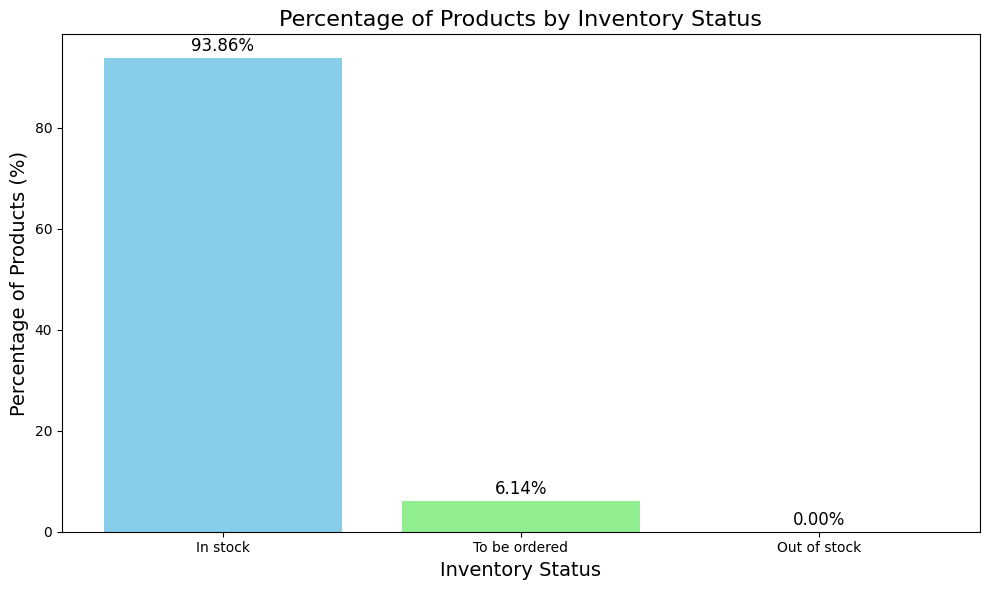

2024-09-09 09:16:37,277 - INFO - Successfully completed plotting.


In [35]:
plot_inventory_status_percentage(df_order_item, df_product)

### Customer Life Time value

In [36]:
from utils.Data_Visualization.visualization import calculate_customer_lifetime_value

In [37]:
df_calculate_customer_lifetime_value = calculate_customer_lifetime_value(df_order_item, df_order, df_customer)
df_calculate_customer_lifetime_value.show()

2024-09-09 09:16:37,300 - INFO - Starting the process to calculate CLV for each customer.
2024-09-09 09:16:37,311 - INFO - Joining order_items with orders to get customer_id.
2024-09-09 09:16:37,326 - INFO - Calculating revenue for each order item.
2024-09-09 09:16:37,345 - INFO - Grouping by customer_id and calculating total revenue (CLV).
2024-09-09 09:16:37,393 - INFO - Joining CLV DataFrame with customers to get customer names.
2024-09-09 09:16:37,414 - INFO - Successfully calculated CLV and joined with customer names.


+-----------+--------------------+------+
|customer_id|       customer_name|   CLV|
+-----------+--------------------+------+
|       1436|     Hannah Mcknight|1409.0|
|        675|     Marvin Mcdaniel|1860.0|
|       3606|           Anna Rose| 344.0|
|       1159|    James Strickland|1780.0|
|        296|         John Garcia|   0.0|
|       4937|         Kara Butler| 297.0|
|       4032|      Jonathan Lewis|   0.0|
|       2162|      Laura Reynolds| 160.0|
|       2136|        Hayley Black| 273.0|
|       1512|      Ashley Santana| 279.0|
|       3368|       Sierra Lucero|1470.0|
|        944|    Kenneth Robinson|1781.0|
|       4975|         Aaron Jones|1524.0|
|       3858|     Jordan Williams|3400.0|
|       2756|Christopher Williams|   5.0|
|       4838|     Lindsey Winters| 225.0|
|       2464|         Erin Parker|8654.0|
|       3517|        Andrew Hines|1159.0|
|       3826|   Michael Rodriguez|  99.0|
|       2110|        Matthew Hall|1291.0|
+-----------+--------------------+

### Top N premium customer

In [38]:
from utils.Data_Visualization.visualization import plot_top_n_premium_customers

2024-09-09 09:16:37,859 - INFO - Starting the plotting process for top 10 premium customers based on CLV.
2024-09-09 09:16:37,862 - INFO - Starting the process to calculate CLV for each customer.
2024-09-09 09:16:37,874 - INFO - Joining order_items with orders to get customer_id.
2024-09-09 09:16:37,887 - INFO - Calculating revenue for each order item.
2024-09-09 09:16:37,910 - INFO - Grouping by customer_id and calculating total revenue (CLV).
2024-09-09 09:16:37,940 - INFO - Joining CLV DataFrame with customers to get customer names.
2024-09-09 09:16:37,953 - INFO - Successfully calculated CLV and joined with customer names.
2024-09-09 09:16:37,954 - INFO - Joining CLV with customer details.
2024-09-09 09:16:37,987 - INFO - Sorting the DataFrame by CLV and selecting the top 10 customers.
2024-09-09 09:16:38,000 - INFO - Collecting the data for plotting.
2024-09-09 09:16:38,489 - INFO - Plotting the top premium customers by CLV.


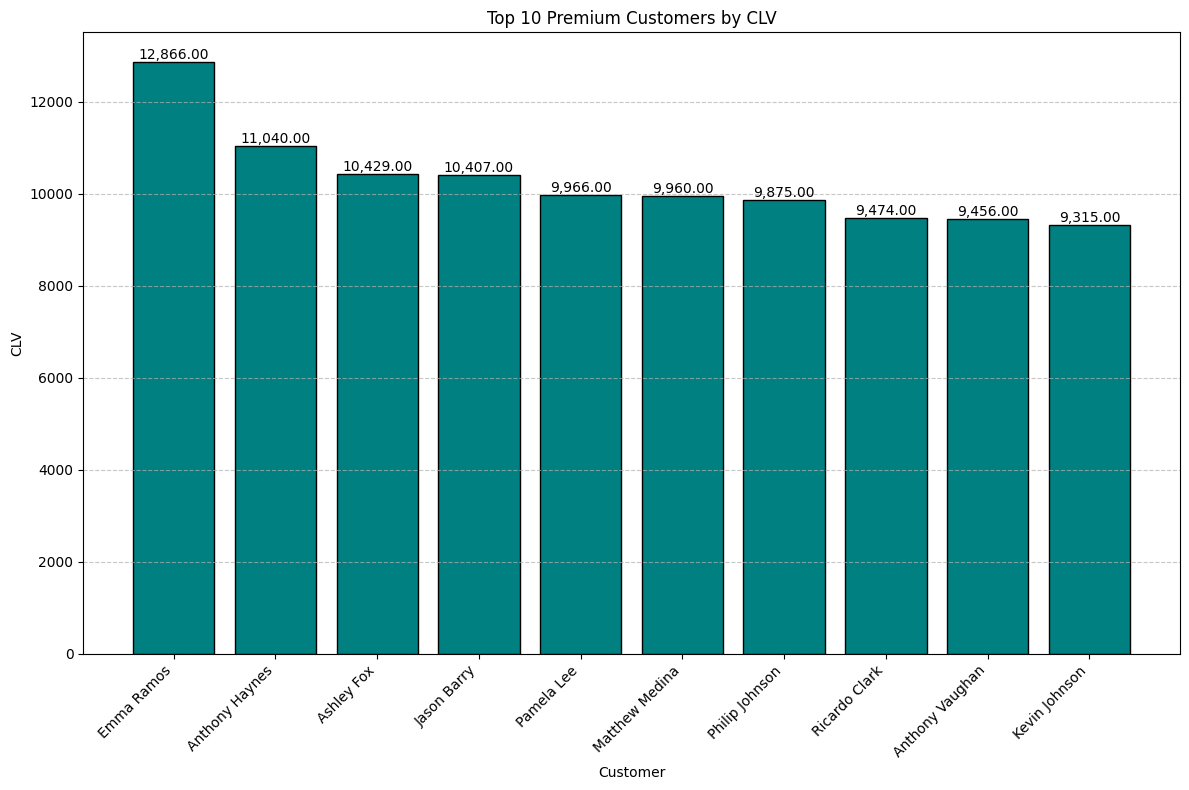

2024-09-09 09:16:38,650 - INFO - Successfully completed plotting.


In [39]:
plot_top_n_premium_customers(df_order_item, df_order, df_customer, top_n=10)

### Calculating yearly Revenue

In [40]:
from utils.Data_Visualization.visualization import calculate_yearly_revenue

In [41]:
df_calculate_yearly_revenue = calculate_yearly_revenue(df_order, df_order_item)
df_calculate_yearly_revenue.show()

2024-09-09 09:16:38,682 - INFO - Starting the calculation of yearly revenue.


+----+-------------+
|year|total_revenue|
+----+-------------+
|2025|      82131.0|
|2023|     599971.0|
|2022|     654428.0|
|2019|     226636.0|
|2020|     584921.0|
|2024|     420434.0|
|2021|     610539.0|
+----+-------------+



### Plot year wise revenue

In [42]:
from utils.Data_Visualization.visualization import plot_yearly_revenue

2024-09-09 09:16:39,114 - INFO - Starting the plotting process for yearly revenue.
2024-09-09 09:16:39,119 - INFO - Starting the calculation of yearly revenue.


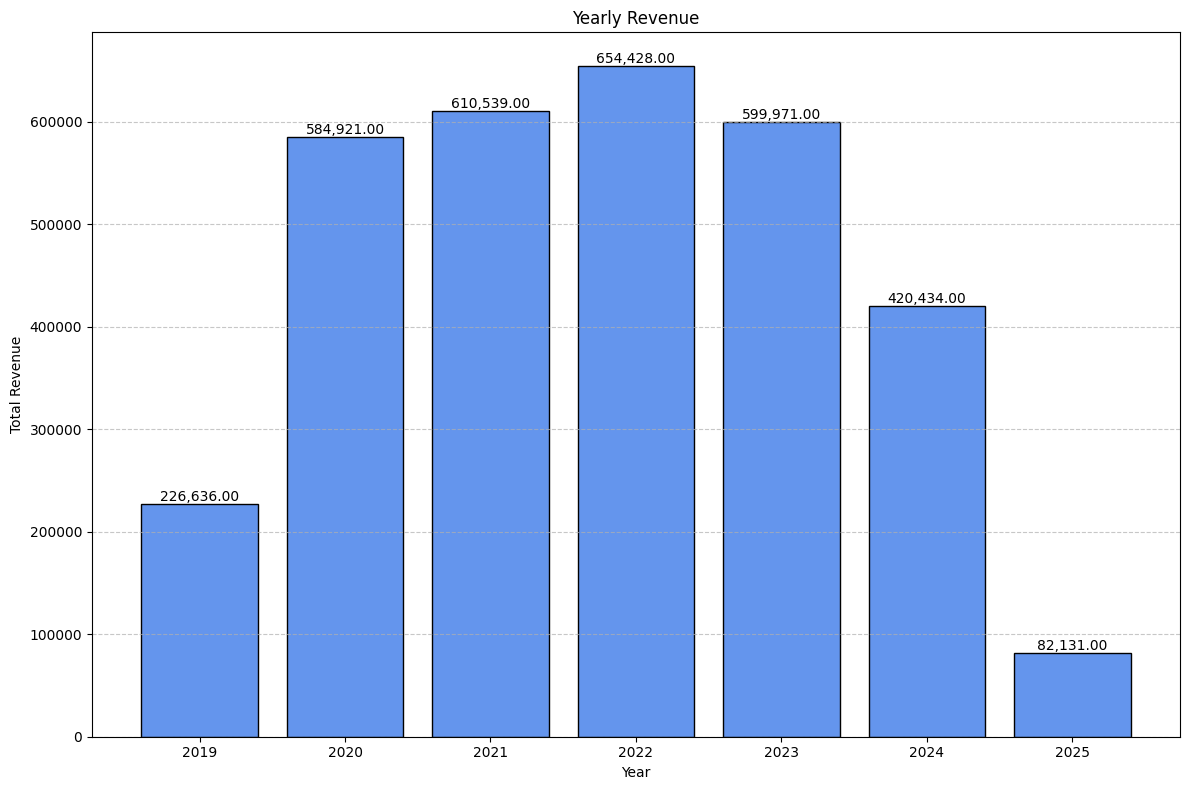

2024-09-09 09:16:39,751 - INFO - Successfully completed plotting yearly revenue.


In [43]:
plot_yearly_revenue(df_order, df_order_item)

### Max Orders Per Year

In [44]:
from utils.Data_Visualization.visualization import get_max_orders_per_year

In [45]:
# Get the DataFrame with maximum orders per year
df_max_orders_per_year = get_max_orders_per_year(df_order)

# Show the results
df_max_orders_per_year.show()


2024-09-09 09:16:39,776 - INFO - Starting the process to calculate maximum orders per year.
2024-09-09 09:16:39,780 - INFO - Extracting year from the order_date column.
2024-09-09 09:16:39,793 - INFO - Counting the number of orders per year.
2024-09-09 09:16:39,821 - INFO - Finding the maximum number of orders per year.
2024-09-09 09:16:39,843 - INFO - Successfully calculated maximum orders per year.


+----+----------+
|year|max_orders|
+----+----------+
|2025|       121|
|2023|       943|
|2022|       970|
|2019|       329|
|2020|       978|
|2024|       701|
|2021|       958|
+----+----------+



### Plot Max Order per year

In [46]:
from utils.Data_Visualization.visualization import plot_max_orders_per_year

2024-09-09 09:16:40,093 - INFO - Starting the plotting process for maximum orders per year.
2024-09-09 09:16:40,097 - INFO - Starting the process to calculate maximum orders per year.
2024-09-09 09:16:40,099 - INFO - Extracting year from the order_date column.
2024-09-09 09:16:40,133 - INFO - Counting the number of orders per year.
2024-09-09 09:16:40,164 - INFO - Finding the maximum number of orders per year.
2024-09-09 09:16:40,183 - INFO - Successfully calculated maximum orders per year.
2024-09-09 09:16:40,184 - INFO - Collecting the data for plotting.
2024-09-09 09:16:40,434 - INFO - Plotting the maximum orders per year.


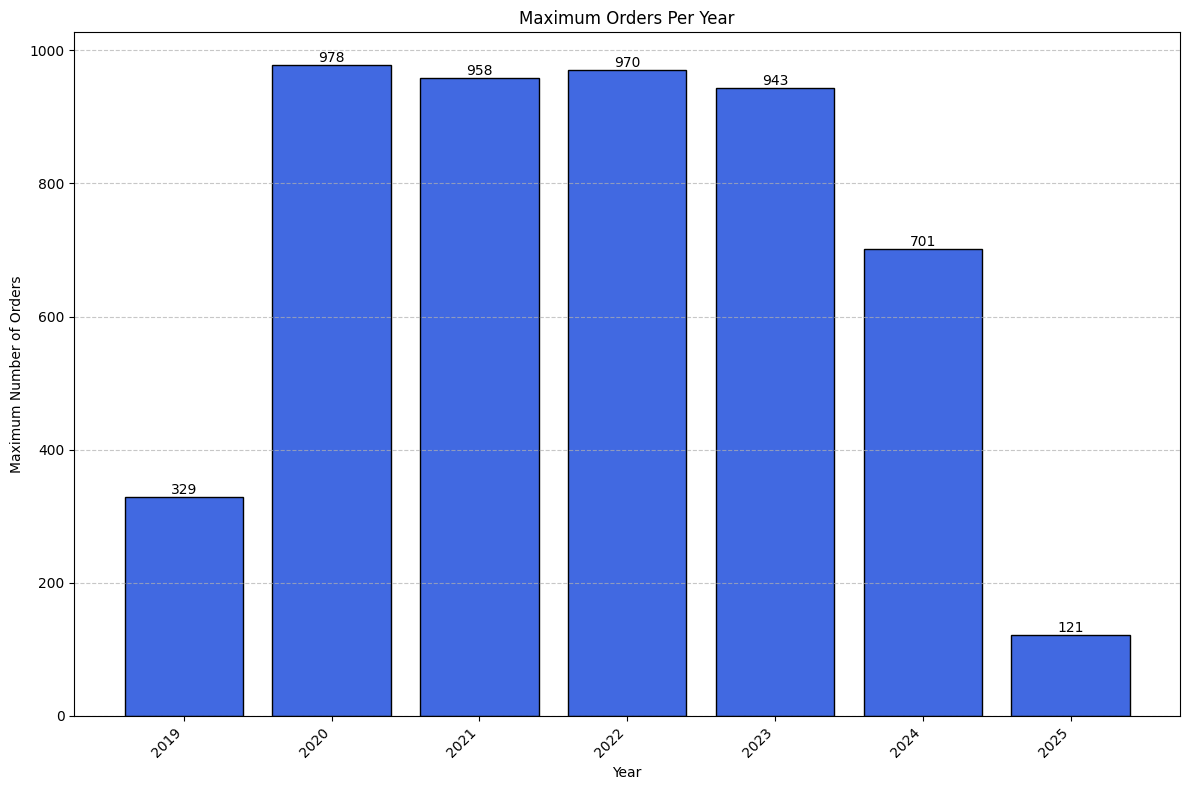

2024-09-09 09:16:40,568 - INFO - Successfully completed plotting.


In [47]:
plot_max_orders_per_year(df_order)

# Products Reviews

In [48]:
from utils.Data_Visualization.visualization import categorize_reviews

In [49]:
df_categorize_reviews = categorize_reviews(df_review, df_product)
df_categorize_reviews.show()

+----------+------------+--------------+----------------+
|product_id|product_name|average_rating| rating_category|
+----------+------------+--------------+----------------+
|      2088|        news|             2|         average|
|       296|    suddenly|             3|    satisfactory|
|       467|        want|             2|         average|
|       675|      chance|             2|         average|
|       691|    physical|             3|    satisfactory|
|       829|  individual|             5|       excellent|
|      1090|     several|             2|         average|
|      1159|     western|             3|    satisfactory|
|      1436|       above|             1|            poor|
|      1512|    somebody|             3|    satisfactory|
|      1572|      player|             2|         average|
|      2069|  investment|             2|         average|
|      2162|  particular|             1|            poor|
|      2294|       chair|             3|    satisfactory|
|      3210|  

### Plot top n products by ratings

In [50]:
from utils.Data_Visualization.visualization import plot_top_n_product_ratings

2024-09-09 09:16:41,035 - INFO - Starting the plotting process for top 10 products with highest average ratings.
2024-09-09 09:16:41,037 - INFO - Collecting data from DataFrame.
2024-09-09 09:16:41,301 - INFO - Extracted product names, ratings, and categories.
2024-09-09 09:16:41,418 - INFO - Plotting top 10 products with highest average ratings.


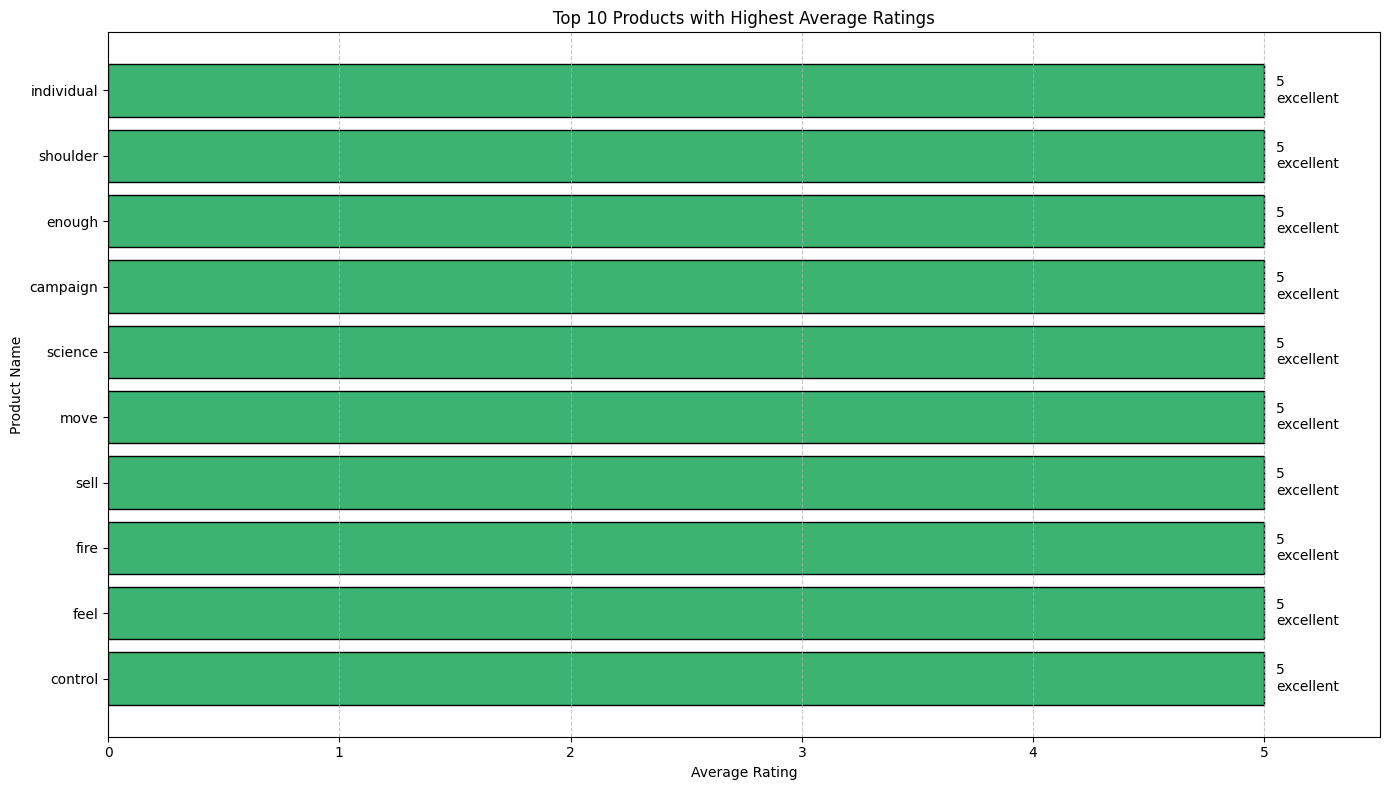

2024-09-09 09:16:41,536 - INFO - Plot displayed successfully.


In [51]:
plot_top_n_product_ratings(df_review, df_product, top_n=10)